# Projet 6: Classer des images à l'aide d'algorithmes de Deep Learning

# Les données

In [1]:
import pandas as pd
import numpy as np
import os, cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
X = [] # Pour stocker les images
Z = [] # Pour stocker les labels
imgsize = 224

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [4]:
# Localisation des images
chihuahua_dir = '/content/gdrive/MyDrive/Images/n02085620-Chihuahua'
maltese_dir = '/content/gdrive/MyDrive/Images/n02085936-Maltese_dog'
basset_dir = '/content/gdrive/MyDrive/Images/n02088238-basset'
doberman_dir = '/content/gdrive/MyDrive/Images/n02107142-Doberman'
afghan_hound_dir = '/content/gdrive/MyDrive/Images/n02088094-Afghan_hound'
english_foxhound_dir = '/content/gdrive/MyDrive/Images/n02089973-English_foxhound'

In [5]:
nbr_classes = 6

# Chargement des images
training_data('chihuahua',chihuahua_dir)
training_data('maltese',maltese_dir)
training_data('basset', basset_dir)
training_data('doberman', doberman_dir)
training_data('afghan_hound', afghan_hound_dir)
training_data('english_foxhound', english_foxhound_dir)

100%|██████████| 157/157 [00:01<00:00, 78.99it/s] 


In [6]:
len(X), len(Z)

(1125, 1125)

In [7]:
X[0].shape

(224, 224, 3)

In [8]:
# Vérifions que les images sont bien toutes en couleurs
set([X[i].shape[2] for i in range(0, len(X))])

{3}

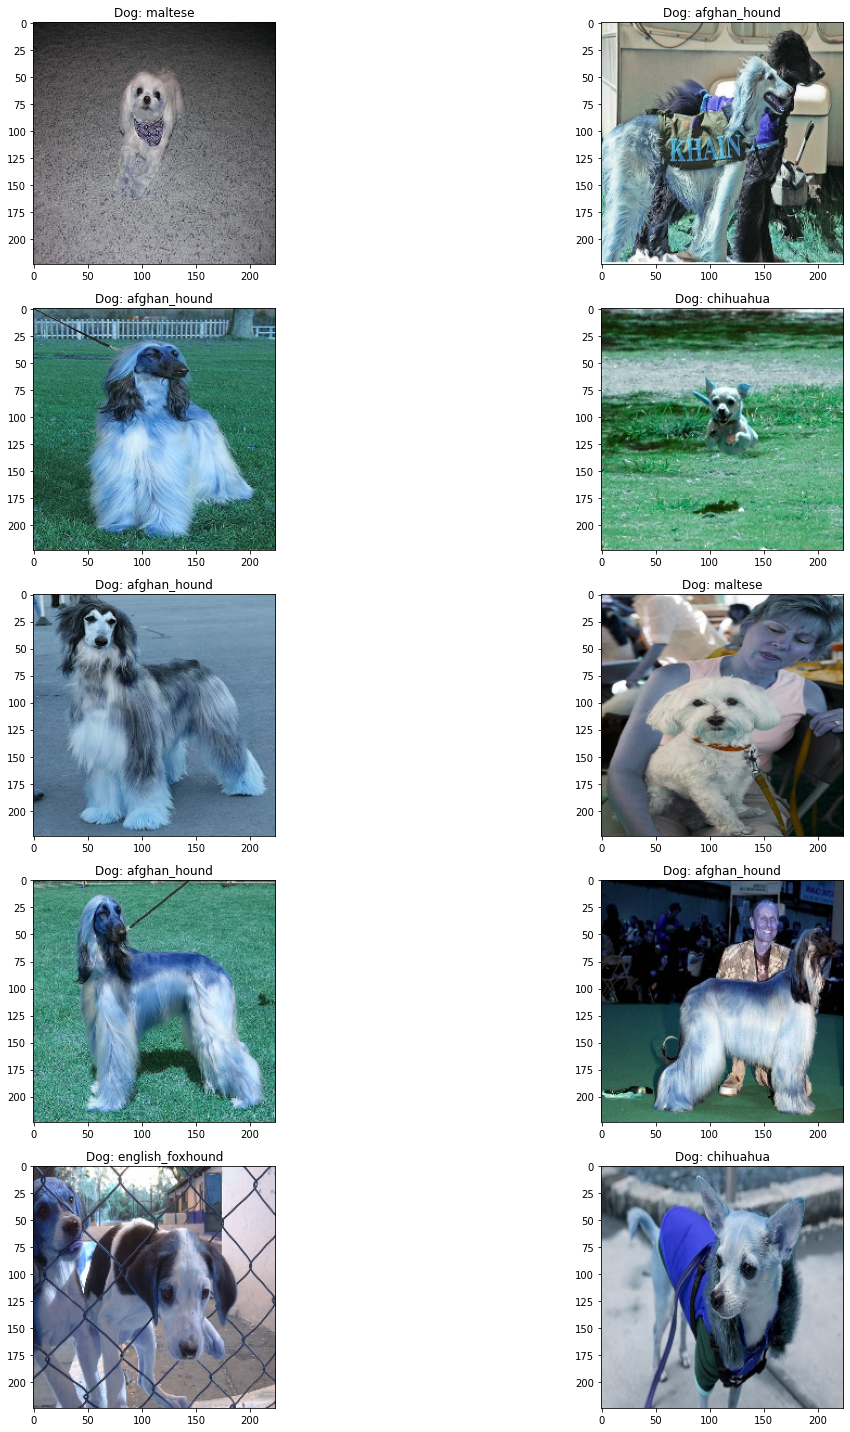

In [9]:
fig,ax=plt.subplots(5,2, figsize=(20,20))
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Dog: '+Z[l])
        
plt.tight_layout()

# Data augmentation

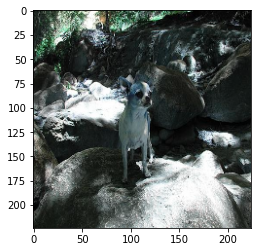

In [10]:
img = X[0].copy()
plt.imshow(img)

## Juste avec numpy

In [11]:
H = 224 # hauteur de l'image
W = 224 # largeur de l'image
shift = 40
figsize = (8,8)

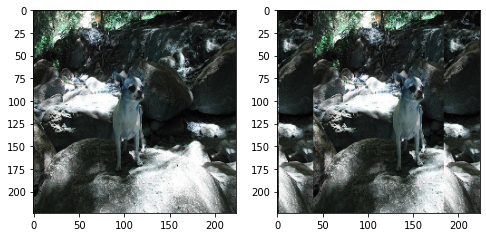

In [13]:
new_img = X[0].copy()

for i in range(W, 1, -1):
    for j in range(H):
        if (i < W-shift):
            new_img[j][i] = new_img[j][i-shift]
        # elif (i < W-1):
        #     new_img[j][i] = 0

fig,ax=plt.subplots(1,2, figsize=figsize)
ax[0].imshow(img)
ax[1].imshow(new_img)

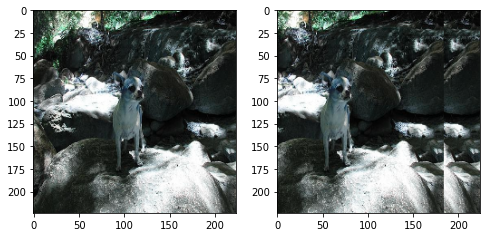

In [14]:
new_img = X[0].copy()

for j in range(H):
    for i in range(W):
        if (i < W-shift):
            new_img[j][i] = new_img[j][i+shift]

fig,ax=plt.subplots(1,2, figsize=figsize)
ax[0].imshow(img)
ax[1].imshow(new_img)

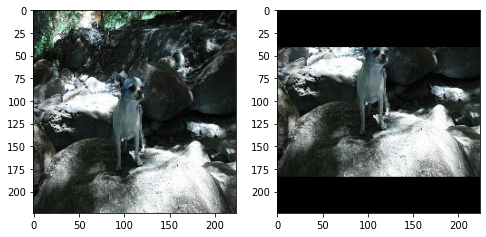

In [16]:
new_img = X[0].copy()

for j in range(H):
    for i in range(W):
        if (j < H-shift and j > shift):
            new_img[j][i] = new_img[j + shift][i]
        else:
            new_img[j][i] = 0

fig,ax=plt.subplots(1,2, figsize=figsize)
ax[0].imshow(img)
ax[1].imshow(new_img)

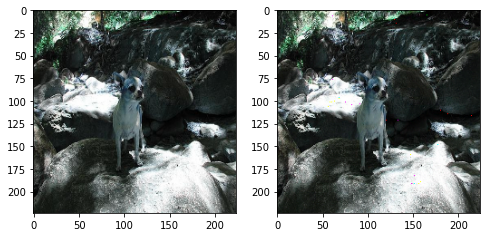

In [17]:
new_img = X[0].copy()
noise = np.random.normal(0, 1, size=(imgsize, imgsize, 3))

for j in range(W):
    for i in range(H):
        for k in range(3):
            if (new_img[i][j][k] != 255):
                new_img[i][j][k] += noise[i][j][k]
                
fig,ax=plt.subplots(1,2, figsize=figsize)
ax[0].imshow(img)
ax[1].imshow(new_img)

## Avec ImageDataGenerator

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
class ShowImageGenerator(ImageDataGenerator):
    
    def show(self, image, figsize=(10, 5), n_range=6, fit_data=None):
        
        if fit_data is not None:
            self.fit(fit_data)
        samples = np.expand_dims(image, 0)
        it = self.flow(samples, batch_size=1)
        plt.figure(figsize=figsize)
        for i in range(n_range):
            plt.subplot(2, 3, i+1)
            for x in it:
                plt.imshow(x[0].astype('uint8'))
                break
        plt.show()

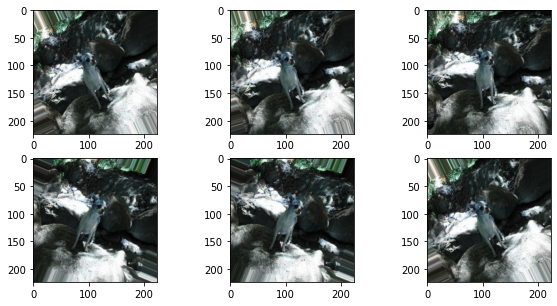

In [20]:
datagen = ShowImageGenerator(rotation_range=30)
datagen.show(image=img)

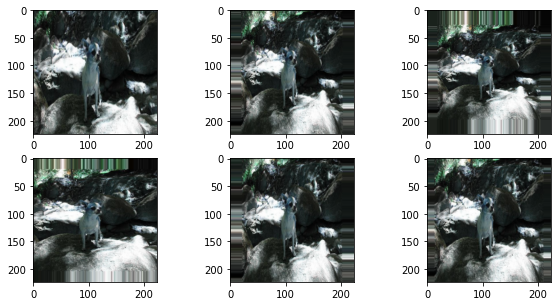

In [21]:
datagen = ShowImageGenerator(zoom_range = 0.3)
datagen.show(image=img)

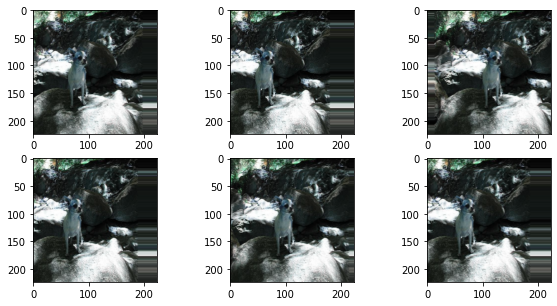

In [22]:
datagen = ShowImageGenerator(width_shift_range=0.2)
datagen.show(image=img)

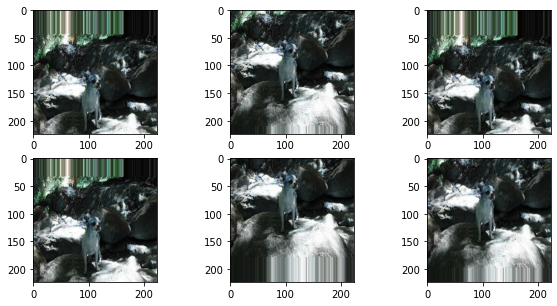

In [23]:
datagen = ShowImageGenerator(height_shift_range=0.2)
datagen.show(image=img)

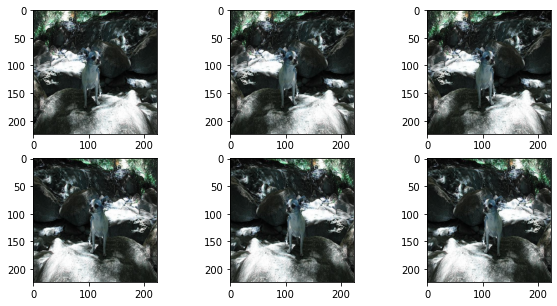

In [24]:
datagen = ShowImageGenerator(horizontal_flip=True)
datagen.show(image=img)

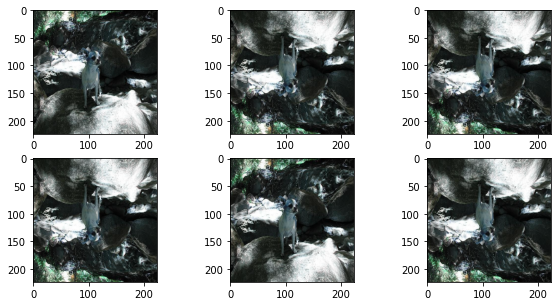

In [25]:
datagen = ShowImageGenerator(vertical_flip=True)
datagen.show(image=img)

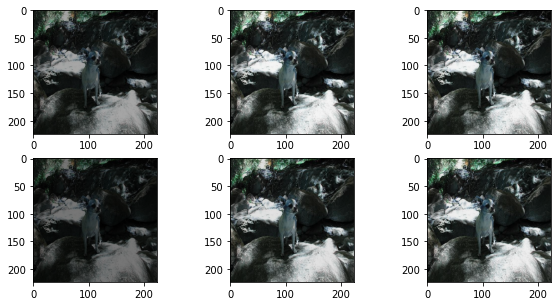

In [26]:
datagen = ShowImageGenerator(brightness_range=[0.2,1.0])

datagen.show(image=img)

# Préprocessing

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from keras.utils.np_utils import to_categorical

In [28]:
encoder= LabelBinarizer()
Y = encoder.fit_transform(Z)
Y

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]])

In [29]:
X = np.array(X)
X=X/255

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=21)

In [30]:
print(X_train.shape)
print(X_test.shape)

(787, 224, 224, 3)
(338, 224, 224, 3)


In [31]:
train_data = (X_train, y_train)
test_data = (X_test, y_test)

# Modélisation

## Création d'un réseau CNN

### Création d'un modèle

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [33]:
tf.random.set_seed(21)

In [34]:
# Création du modèle
model = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(imgsize, imgsize, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(nbr_classes, activation='softmax') 
])

# Compilation du modèle
model.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Entraînement
history = model.fit(X_train, y_train,  
                        epochs=50,
                        validation_data=test_data)

Epoch 1/50
25/25 [==============================] - 15s 90ms/step - loss: 1.7620 - accuracy: 0.2706 - val_loss: 1.7552 - val_accuracy: 0.2811
Epoch 2/50
25/25 [==============================] - 1s 48ms/step - loss: 1.6062 - accuracy: 0.3532 - val_loss: 1.6162 - val_accuracy: 0.3698
Epoch 3/50
25/25 [==============================] - 1s 48ms/step - loss: 1.4502 - accuracy: 0.4473 - val_loss: 1.5242 - val_accuracy: 0.4172
Epoch 4/50
25/25 [==============================] - 1s 48ms/step - loss: 1.3030 - accuracy: 0.4956 - val_loss: 1.5371 - val_accuracy: 0.4083
Epoch 5/50
25/25 [==============================] - 1s 53ms/step - loss: 1.2214 - accuracy: 0.5578 - val_loss: 1.5475 - val_accuracy: 0.4290
Epoch 6/50
25/25 [==============================] - 1s 48ms/step - loss: 1.1126 - accuracy: 0.5909 - val_loss: 1.8033 - val_accuracy: 0.3935
Epoch 7/50
25/25 [==============================] - 1s 48ms/step - loss: 0.9685 - accuracy: 0.6366 - val_loss: 1.6954 - val_accuracy: 0.4349
Epoch 8/50
2

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Tracer des courbes 'loss' et 'accuracy'

In [36]:
def plot_loss_curves(history):
    """
    Trace les courbes de 'loss' et 'accuracy' pour les jeux d'entraînement et de validation
    """
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

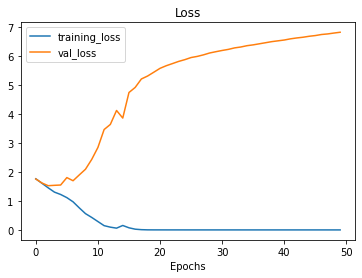

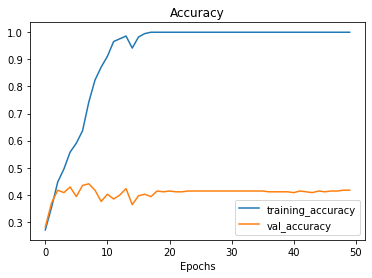

In [37]:
plot_loss_curves(history)

## Prédiction

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
y_pred = model.predict(X_test)

In [40]:
def get_pred_label(array):
    (n, m) = array.shape
    for i in range(n):
        indice_max = array[i].argmax()
        for j in range(m):
            if j == indice_max:
                array[i][j] = 1
            else:
                array[i][j] = 0

In [41]:
confusion_matrix(y_true=encoder.inverse_transform(y_test), y_pred=encoder.inverse_transform(y_pred))

array([[38,  0,  7,  9,  4,  5],
       [17, 14,  4, 10,  0,  8],
       [15,  7,  8,  4,  1, 11],
       [ 9,  5,  5, 17,  3,  3],
       [12, 11,  6,  6, 19,  8],
       [ 8,  5,  7,  2,  5, 45]])

In [42]:
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    """
    Créer une matrice de confusion avec des couleurs pour distinguer ce qui est bon ou mauvais
    bon = diagonale foncée + le reste clair
    
    Arguments:
        y_true: Array des vrais labels
        y_pred: Array des labels prédits (même format que y_true)
        classes: Array des labels (noms de type string), si 'None' on utilisera des entiers
        figsize: Taille de la figure en sortie ( par defaut (10, 10))
        text_size: Taille des textes en sortie (par defaut 15)
    
    """
    
    # Création de la matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalisée
    n_classes = cm.shape[0] # nombre de classes présentes
    
    # Tracer de la figure
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    
    # classes
    if classes:
        labels = classes
    else:
        labels = np.arange(n_classes)
        
    # Les axes
    
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes), 
           yticks=np.arange(n_classes), 
           xticklabels=labels, 
           yticklabels=labels)
    
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    # Seuil pour les différentes couleurs
    
    seuil = (cm.max() + cm.min()) / 2
    
    # Ajout du texte dans chaque cellule
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > seuil else "black",
                 size=text_size)

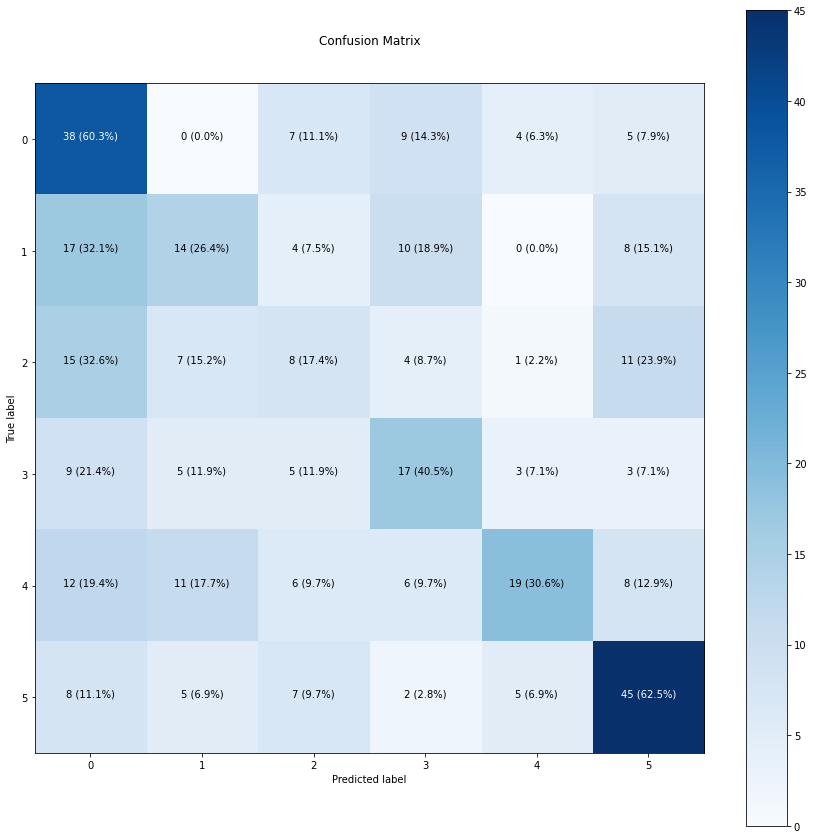

In [43]:
make_confusion_matrix(y_true=encoder.inverse_transform(y_test), 
                      y_pred=encoder.inverse_transform(y_pred),
                      figsize=(15, 15),
                      text_size=10)

## Recherche d'un meilleur learning rate

In [44]:
# Création du modèle
model = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(imgsize, imgsize, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(nbr_classes, activation='softmax') 
])

# Compilation du modèle
model.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Entraînement
lr_history = model.fit(X_train, y_train,  
                        epochs=40,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[lr_scheduler])

Epoch 1/40
2/2 [==============================] - 15s 8s/step - loss: 1.7903 - accuracy: 0.1804 - val_loss: 1.7824 - val_accuracy: 0.2041 - lr: 0.0010
Epoch 2/40
2/2 [==============================] - 1s 642ms/step - loss: 1.7317 - accuracy: 0.2922 - val_loss: 1.7656 - val_accuracy: 0.2692 - lr: 0.0011
Epoch 3/40
2/2 [==============================] - 1s 775ms/step - loss: 1.6856 - accuracy: 0.3291 - val_loss: 1.7835 - val_accuracy: 0.2130 - lr: 0.0013
Epoch 4/40
2/2 [==============================] - 1s 778ms/step - loss: 1.6329 - accuracy: 0.3075 - val_loss: 1.7372 - val_accuracy: 0.2781 - lr: 0.0014
Epoch 5/40
2/2 [==============================] - 1s 778ms/step - loss: 1.5495 - accuracy: 0.4066 - val_loss: 1.7100 - val_accuracy: 0.2959 - lr: 0.0016
Epoch 6/40
2/2 [==============================] - 1s 647ms/step - loss: 1.4727 - accuracy: 0.4358 - val_loss: 1.6290 - val_accuracy: 0.3136 - lr: 0.0018
Epoch 7/40
2/2 [==============================] - 1s 780ms/step - loss: 1.3608 - acc

Text(0.5, 1.0, 'Recherche du meilleur learning rate')

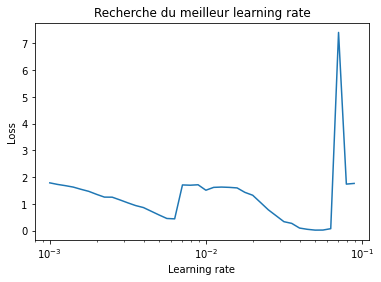

In [45]:
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, lr_history.history["loss"]) 
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Recherche du meilleur learning rate")

## Ajout de couches

In [46]:
def build_model(layers, optimizers):
    
    model = Sequential([
      Conv2D(10, 3, activation='relu', input_shape=(imgsize, imgsize, 3)),
      Conv2D(10, 3, activation='relu'),
      MaxPool2D(),
      Conv2D(10, 3, activation='relu'),
      Conv2D(10, 3, activation='relu'),
      MaxPool2D(),
      Conv2D(10, 3, activation='relu'),
      Conv2D(10, 3, activation='relu'),
      MaxPool2D(),
      Flatten()])
    
    for i in layers[:-1]:
        model.add(Dense(i, activation='relu'))
    model.add(Dense(layers[-1], activation='softmax'))
        
    model.compile(loss="categorical_crossentropy", 
                    optimizer=optimizers,
                    metrics=["accuracy"])
    return model

In [47]:
model = build_model([20, nbr_classes], tf.keras.optimizers.Adam())

history = model.fit(X_train, y_train,  
                        epochs=50,
                        validation_data=test_data)

Epoch 1/50
25/25 [==============================] - 2s 66ms/step - loss: 1.7770 - accuracy: 0.2147 - val_loss: 1.8012 - val_accuracy: 0.1864
Epoch 2/50
25/25 [==============================] - 1s 49ms/step - loss: 1.7583 - accuracy: 0.2249 - val_loss: 1.7747 - val_accuracy: 0.1864
Epoch 3/50
25/25 [==============================] - 1s 49ms/step - loss: 1.7527 - accuracy: 0.2249 - val_loss: 1.7688 - val_accuracy: 0.2041
Epoch 4/50
25/25 [==============================] - 1s 49ms/step - loss: 1.7089 - accuracy: 0.2719 - val_loss: 1.7567 - val_accuracy: 0.2189
Epoch 5/50
25/25 [==============================] - 1s 50ms/step - loss: 1.6076 - accuracy: 0.3520 - val_loss: 1.6448 - val_accuracy: 0.3580
Epoch 6/50
25/25 [==============================] - 1s 55ms/step - loss: 1.5158 - accuracy: 0.3990 - val_loss: 1.5872 - val_accuracy: 0.4053
Epoch 7/50
25/25 [==============================] - 1s 49ms/step - loss: 1.3734 - accuracy: 0.5032 - val_loss: 1.6168 - val_accuracy: 0.3905
Epoch 8/50
25

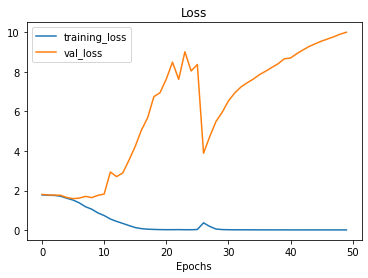

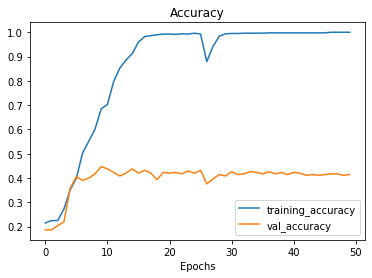

In [48]:
plot_loss_curves(history)

In [ ]:
y_pred = model.predict(X_test)

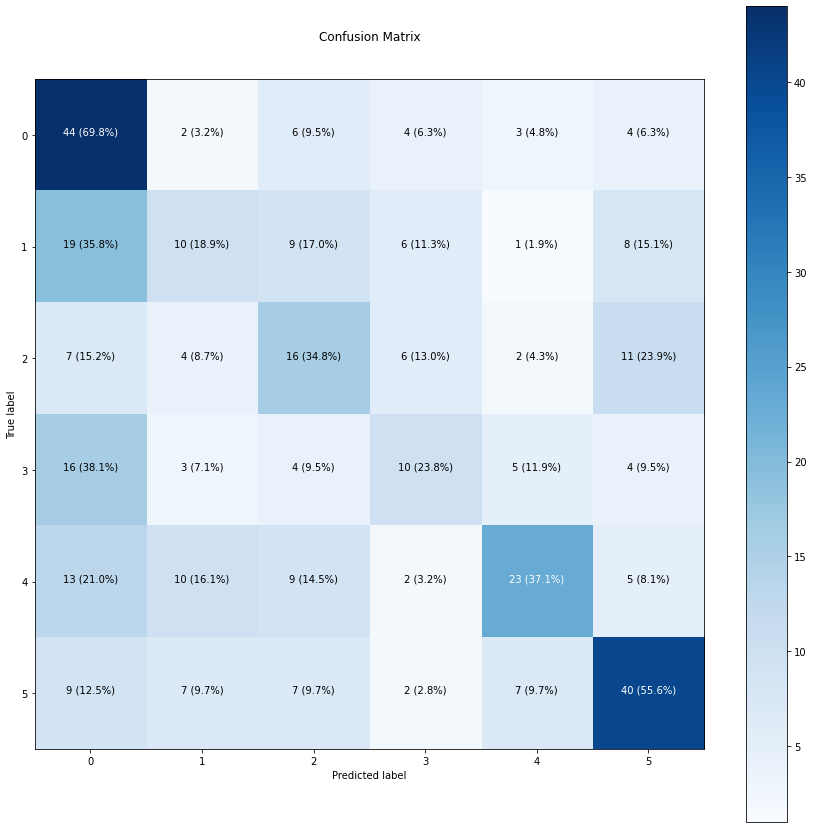

In [ ]:
make_confusion_matrix(y_true=encoder.inverse_transform(y_test), 
                      y_pred=encoder.inverse_transform(y_pred),
                      figsize=(15, 15),
                      text_size=10)

## Tests de différents optimizers

In [ ]:
model = build_model([20, 20, nbr_classes], tf.keras.optimizers.Adam())

history_adam = model.fit(X_train, y_train,  
                        epochs=100,
                        validation_data=test_data,
                         verbose=0)

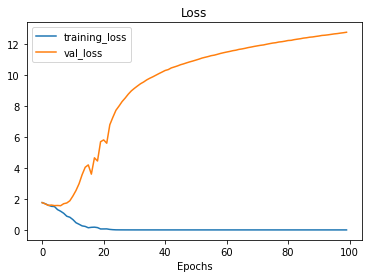

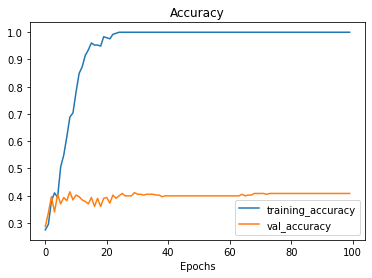

In [ ]:
plot_loss_curves(history_adam)

In [ ]:
model = build_model([20, 20, nbr_classes], tf.keras.optimizers.SGD())

history_SGD = model.fit(X_train, y_train,  
                        epochs=100,
                        validation_data=test_data,
                        verbose=0)

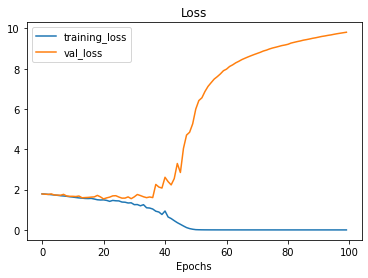

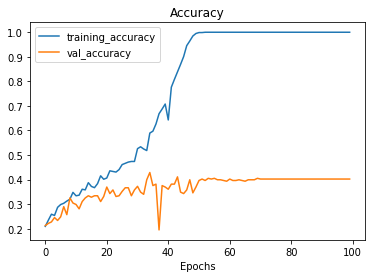

In [ ]:
plot_loss_curves(history_SGD)

In [ ]:
model = build_model([20, 20, nbr_classes], tf.keras.optimizers.Adagrad())

history_adagrag = model.fit(X_train, y_train,  
                        epochs=100,
                        validation_data=test_data,
                        verbose=0)

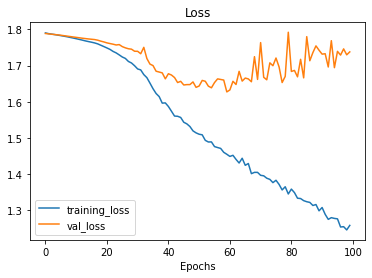

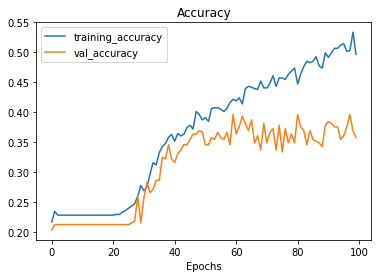

In [ ]:
plot_loss_curves(history_adagrag)

In [ ]:
model = build_model([20, 20, nbr_classes], tf.keras.optimizers.RMSprop())

history_rmsprop = model.fit(X_train, y_train,  
                        epochs=100,
                        validation_data=test_data,
                        verbose=0)

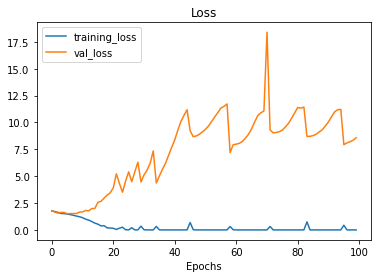

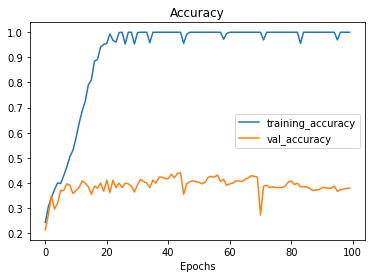

In [ ]:
plot_loss_curves(history_rmsprop)

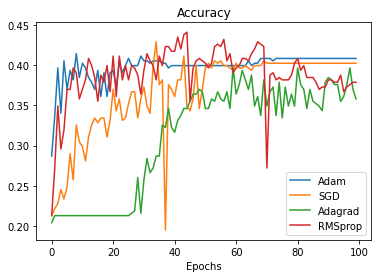

In [ ]:
epochs = range(len(history_adam.history['loss']))
plt.plot(epochs, history_adam.history['val_accuracy'], label='Adam')
plt.plot(epochs, history_SGD.history['val_accuracy'], label='SGD')
plt.plot(epochs, history_adagrag.history['val_accuracy'], label='Adagrad')
plt.plot(epochs, history_rmsprop.history['val_accuracy'], label='RMSprop')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

## Avec Data augmentation

In [64]:
aug_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False)

In [ ]:
model = build_model([20, 20, nbr_classes], tf.keras.optimizers.Adam())

history = model.fit(aug_gen.flow(X_train, y_train),  
                        epochs=50,
                        validation_data=test_data,
                        verbose=0)

Epoch 1/50
25/25 [==============================] - 9s 342ms/step - loss: 1.7836 - accuracy: 0.2033 - val_loss: 1.7818 - val_accuracy: 0.1864
Epoch 2/50
25/25 [==============================] - 9s 341ms/step - loss: 1.7700 - accuracy: 0.2249 - val_loss: 1.7805 - val_accuracy: 0.1864
Epoch 3/50
25/25 [==============================] - 9s 352ms/step - loss: 1.7500 - accuracy: 0.2490 - val_loss: 1.8885 - val_accuracy: 0.1953
Epoch 4/50
25/25 [==============================] - 8s 323ms/step - loss: 1.7526 - accuracy: 0.2846 - val_loss: 1.7692 - val_accuracy: 0.2485
Epoch 5/50
25/25 [==============================] - 8s 321ms/step - loss: 1.7152 - accuracy: 0.2745 - val_loss: 1.7532 - val_accuracy: 0.2633
Epoch 6/50
25/25 [==============================] - 8s 322ms/step - loss: 1.6874 - accuracy: 0.2961 - val_loss: 1.7780 - val_accuracy: 0.3136
Epoch 7/50
25/25 [==============================] - 8s 320ms/step - loss: 1.6220 - accuracy: 0.3698 - val_loss: 1.7549 - val_accuracy: 0.2959
Epoch 

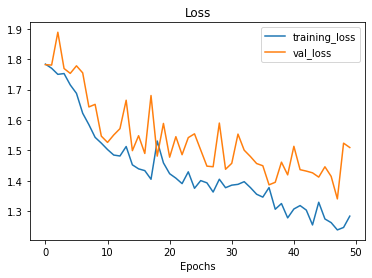

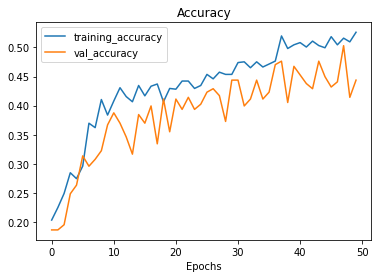

In [ ]:
plot_loss_curves(history)

In [ ]:
model = build_model([60, 60, nbr_classes], tf.keras.optimizers.Adam())

history = model.fit(aug_gen.flow(X_train, y_train),  
                        epochs=100,
                        validation_data=test_data,
                        verbose=0)

Epoch 1/100
25/25 [==============================] - 9s 341ms/step - loss: 1.7719 - accuracy: 0.2186 - val_loss: 1.7801 - val_accuracy: 0.1893
Epoch 2/100
25/25 [==============================] - 8s 327ms/step - loss: 1.7521 - accuracy: 0.2490 - val_loss: 1.7431 - val_accuracy: 0.2870
Epoch 3/100
25/25 [==============================] - 8s 327ms/step - loss: 1.7450 - accuracy: 0.2592 - val_loss: 1.7527 - val_accuracy: 0.2692
Epoch 4/100
25/25 [==============================] - 8s 323ms/step - loss: 1.6989 - accuracy: 0.3011 - val_loss: 1.6821 - val_accuracy: 0.2959
Epoch 5/100
25/25 [==============================] - 8s 323ms/step - loss: 1.6560 - accuracy: 0.3202 - val_loss: 1.6111 - val_accuracy: 0.3136
Epoch 6/100
25/25 [==============================] - 8s 324ms/step - loss: 1.6279 - accuracy: 0.3215 - val_loss: 1.5338 - val_accuracy: 0.3550
Epoch 7/100
25/25 [==============================] - 8s 323ms/step - loss: 1.6803 - accuracy: 0.2884 - val_loss: 1.5703 - val_accuracy: 0.3225

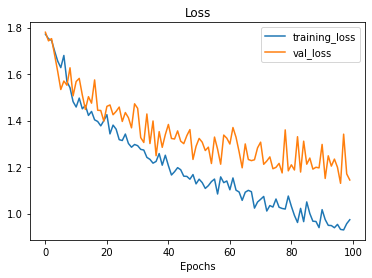

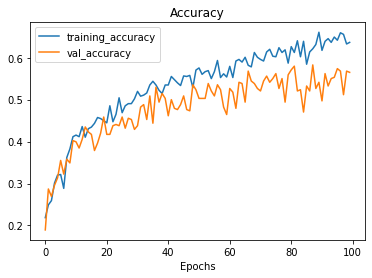

In [ ]:
plot_loss_curves(history)

In [ ]:
import math

In [ ]:
def step_decay(epoch):
  initial_lrate = 0.01
  drop = 0.5
  epoch_drop = 10.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epoch_drop))
  return lrate

lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [ ]:
model = build_model([60, 60, nbr_classes], tf.keras.optimizers.Adam())

history = model.fit(aug_gen.flow(X_train, y_train),  
                        epochs=100,
                        validation_data=test_data,
                        callbacks=[lrate],
                        verbose=0)

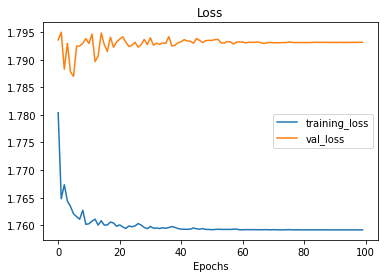

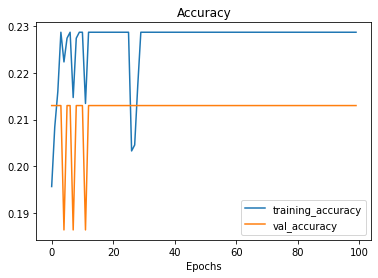

In [ ]:
plot_loss_curves(history)

In [ ]:
y_pred = model.predict(X_test)

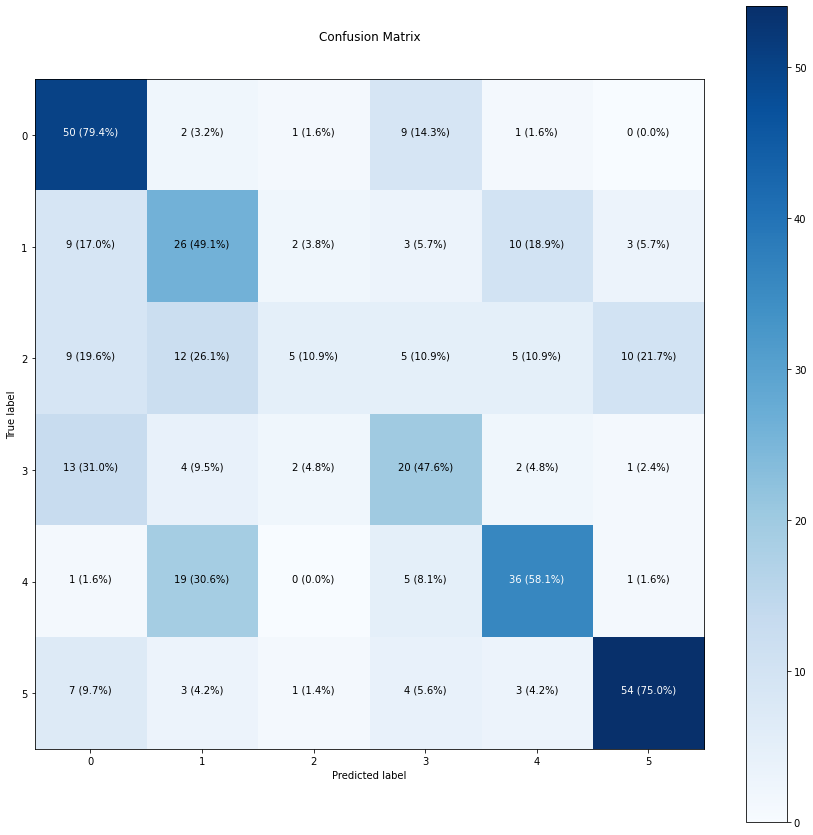

In [ ]:
make_confusion_matrix(y_true=encoder.inverse_transform(y_test), 
                      y_pred=encoder.inverse_transform(y_pred),
                      figsize=(15, 15),
                      text_size=10)

## Optimisation des hyperparamètres

In [ ]:
import keras_tuner

In [ ]:
def build_model(hp):
    model = Sequential([
        Conv2D(10, 3, activation='relu', input_shape=(imgsize, imgsize, 3)),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Conv2D(10, 3, activation='relu'),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Conv2D(10, 3, activation='relu'),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Flatten()])
    model.add(Dense(
        units = hp.Int("units", min_value=10, max_value=100, step=10), 
        activation='relu'))
              
    model.add(Dense(nbr_classes, activation='softmax'))
              
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
              
    model.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                metrics=["accuracy"])
    return model

In [ ]:
build_model(keras_tuner.HyperParameters())

In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 10, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
tuner.search(X_train, y_train, epochs=3, validation_data=test_data)

Trial 3 Complete [00h 00m 12s]
val_accuracy: 0.2544378712773323

Best val_accuracy So Far: 0.35207100212574005
Total elapsed time: 00h 00m 36s


In [ ]:
models = tuner.get_best_models(num_models=1)

In [ ]:
best_model = models[0]

In [ ]:
best_model.build()

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Transfert learning

## VGG16

In [49]:
from keras.applications.vgg16 import VGG16,preprocess_input

In [50]:
base_model = VGG16(include_top=False,
                  input_shape = (imgsize,imgsize,3),
                  weights = 'imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [51]:
for layer in base_model.layers:
    layer.trainable = False

In [52]:
model = Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(Dense(nbr_classes,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 14,717,766
Trainable params: 3,078
Non-trainable params: 14,714,688
_________________________________________________________________


In [53]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [54]:
history = model.fit(
    X_train, y_train,
    validation_data  = test_data,
    epochs = 40)

Epoch 1/40
25/25 [==============================] - 14s 412ms/step - loss: 1.9561 - accuracy: 0.2186 - val_loss: 1.7321 - val_accuracy: 0.2840
Epoch 2/40
25/25 [==============================] - 6s 235ms/step - loss: 1.8008 - accuracy: 0.2452 - val_loss: 1.6390 - val_accuracy: 0.3935
Epoch 3/40
25/25 [==============================] - 6s 235ms/step - loss: 1.6897 - accuracy: 0.3240 - val_loss: 1.5626 - val_accuracy: 0.4734
Epoch 4/40
25/25 [==============================] - 6s 233ms/step - loss: 1.5813 - accuracy: 0.3863 - val_loss: 1.4892 - val_accuracy: 0.5444
Epoch 5/40
25/25 [==============================] - 6s 232ms/step - loss: 1.4887 - accuracy: 0.4651 - val_loss: 1.4337 - val_accuracy: 0.5769
Epoch 6/40
25/25 [==============================] - 6s 232ms/step - loss: 1.4420 - accuracy: 0.4587 - val_loss: 1.3751 - val_accuracy: 0.6124
Epoch 7/40
25/25 [==============================] - 6s 230ms/step - loss: 1.3731 - accuracy: 0.5451 - val_loss: 1.3192 - val_accuracy: 0.6450
Epoch

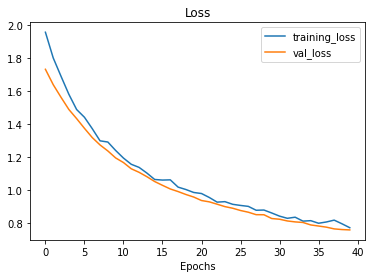

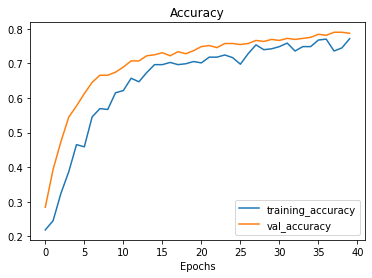

In [55]:
plot_loss_curves(history)

In [56]:
y_pred = model.predict(X_test)

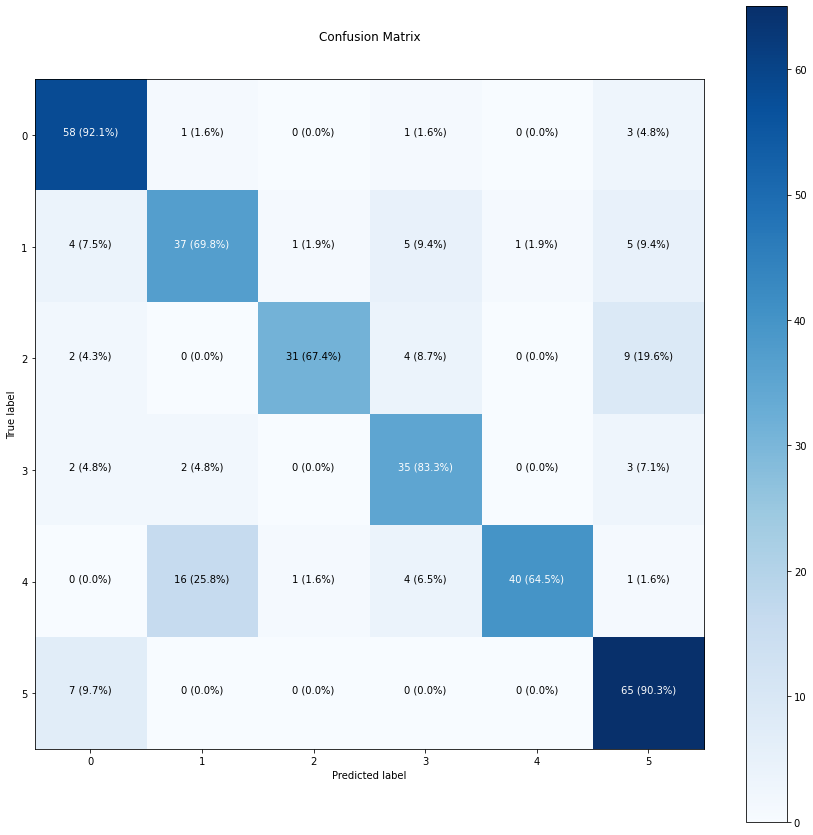

In [57]:
make_confusion_matrix(y_true=encoder.inverse_transform(y_test), 
                      y_pred=encoder.inverse_transform(y_pred),
                      figsize=(15, 15),
                      text_size=10)

In [61]:
model.save('/content/gdrive/MyDrive/saved_models/vgg16_model')

In [ ]:
history = model.fit(aug_gen.flow(X_train, y_train),  
                        epochs=100,
                        validation_data=test_data)

Epoch 1/100
25/25 [==============================] - 11s 424ms/step - loss: 0.7197 - accuracy: 0.7560 - val_loss: 0.5713 - val_accuracy: 0.8402
Epoch 2/100
25/25 [==============================] - 10s 418ms/step - loss: 0.7612 - accuracy: 0.7471 - val_loss: 0.5717 - val_accuracy: 0.8432
Epoch 3/100
25/25 [==============================] - 10s 419ms/step - loss: 0.7164 - accuracy: 0.7573 - val_loss: 0.5707 - val_accuracy: 0.8343
Epoch 4/100
25/25 [==============================] - 10s 417ms/step - loss: 0.7463 - accuracy: 0.7459 - val_loss: 0.5771 - val_accuracy: 0.8254
Epoch 5/100
25/25 [==============================] - 10s 418ms/step - loss: 0.7323 - accuracy: 0.7510 - val_loss: 0.5669 - val_accuracy: 0.8343
Epoch 6/100
25/25 [==============================] - 10s 418ms/step - loss: 0.7246 - accuracy: 0.7484 - val_loss: 0.5659 - val_accuracy: 0.8343
Epoch 7/100
25/25 [==============================] - 11s 420ms/step - loss: 0.7404 - accuracy: 0.7548 - val_loss: 0.5671 - val_accuracy:

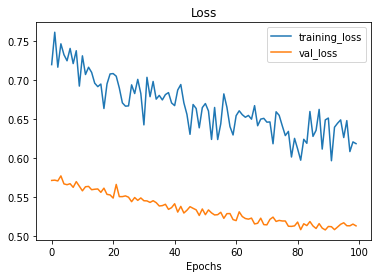

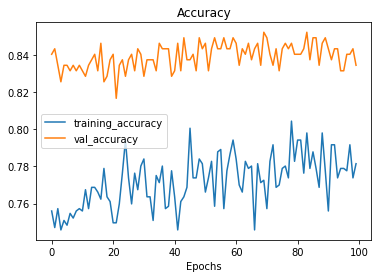

In [ ]:
plot_loss_curves(history)

In [62]:
def step_decay(epoch):
  initial_lrate = 0.01
  drop = 0.5
  epoch_drop = 10.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epoch_drop))
  return lrate

lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [65]:
history = model.fit(aug_gen.flow(X_train, y_train),  
                        epochs=50,
                        validation_data=test_data)

Epoch 1/50
25/25 [==============================] - 12s 448ms/step - loss: 0.8935 - accuracy: 0.7154 - val_loss: 0.7491 - val_accuracy: 0.8018
Epoch 2/50
25/25 [==============================] - 11s 439ms/step - loss: 0.9048 - accuracy: 0.7103 - val_loss: 0.7433 - val_accuracy: 0.7959
Epoch 3/50
25/25 [==============================] - 11s 435ms/step - loss: 0.8986 - accuracy: 0.7128 - val_loss: 0.7414 - val_accuracy: 0.7899
Epoch 4/50
25/25 [==============================] - 13s 524ms/step - loss: 0.9062 - accuracy: 0.7090 - val_loss: 0.7367 - val_accuracy: 0.8018
Epoch 5/50
25/25 [==============================] - 11s 439ms/step - loss: 0.8983 - accuracy: 0.7294 - val_loss: 0.7252 - val_accuracy: 0.8018
Epoch 6/50
25/25 [==============================] - 11s 438ms/step - loss: 0.8770 - accuracy: 0.7255 - val_loss: 0.7264 - val_accuracy: 0.8018
Epoch 7/50
25/25 [==============================] - 11s 436ms/step - loss: 0.8945 - accuracy: 0.7128 - val_loss: 0.7183 - val_accuracy: 0.7988

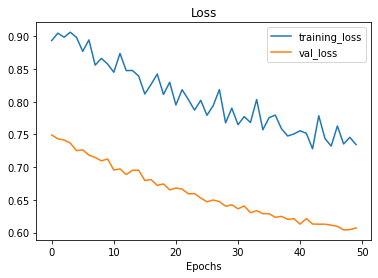

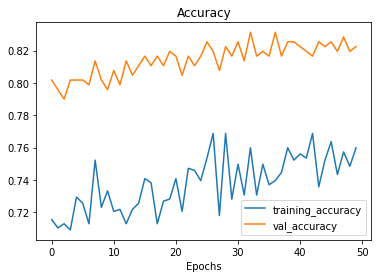

In [66]:
plot_loss_curves(history)

## InceptionResnetV2

In [ ]:
base_model = tf.keras.applications.InceptionResNetV2(include_top=False,
                  input_shape = (imgsize,imgsize,3),
                  weights = 'imagenet')

219070464/219055592 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_1   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1536)              0         
                                                                 
 dense_23 (Dense)            (None, 6)                 9222      
                                                                 
Total params: 54,345,958
Trainable params: 9,222
Non-trainable params: 54,336,736
_________________________________________________________________


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data  = test_data,
    epochs = 30)

Epoch 1/30
25/25 [==============================] - 23s 464ms/step - loss: 0.8165 - accuracy: 0.7306 - val_loss: 0.1146 - val_accuracy: 0.9704
Epoch 2/30
25/25 [==============================] - 6s 249ms/step - loss: 0.1762 - accuracy: 0.9403 - val_loss: 0.0847 - val_accuracy: 0.9763
Epoch 3/30
25/25 [==============================] - 6s 250ms/step - loss: 0.1622 - accuracy: 0.9441 - val_loss: 0.0735 - val_accuracy: 0.9793
Epoch 4/30
25/25 [==============================] - 6s 250ms/step - loss: 0.1031 - accuracy: 0.9632 - val_loss: 0.0711 - val_accuracy: 0.9734
Epoch 5/30
25/25 [==============================] - 6s 251ms/step - loss: 0.1153 - accuracy: 0.9606 - val_loss: 0.0611 - val_accuracy: 0.9793
Epoch 6/30
25/25 [==============================] - 6s 250ms/step - loss: 0.0872 - accuracy: 0.9657 - val_loss: 0.0552 - val_accuracy: 0.9822
Epoch 7/30
25/25 [==============================] - 6s 255ms/step - loss: 0.0721 - accuracy: 0.9797 - val_loss: 0.0645 - val_accuracy: 0.9763
Epoch

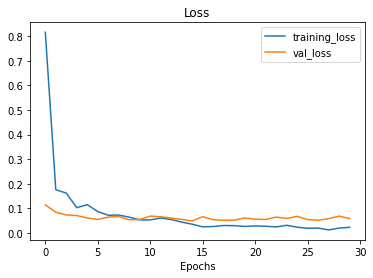

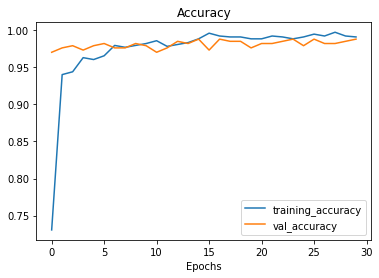

In [ ]:
plot_loss_curves(history)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data  = test_data,
    epochs = 50,
    callbacks=[lrate],
    verbose=0)

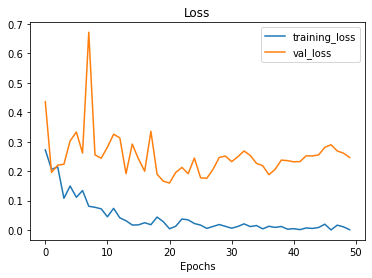

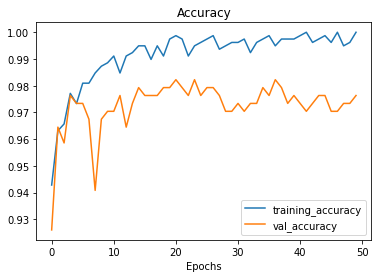

In [ ]:
plot_loss_curves(history)

In [ ]:
y_pred = model.predict(X_test)

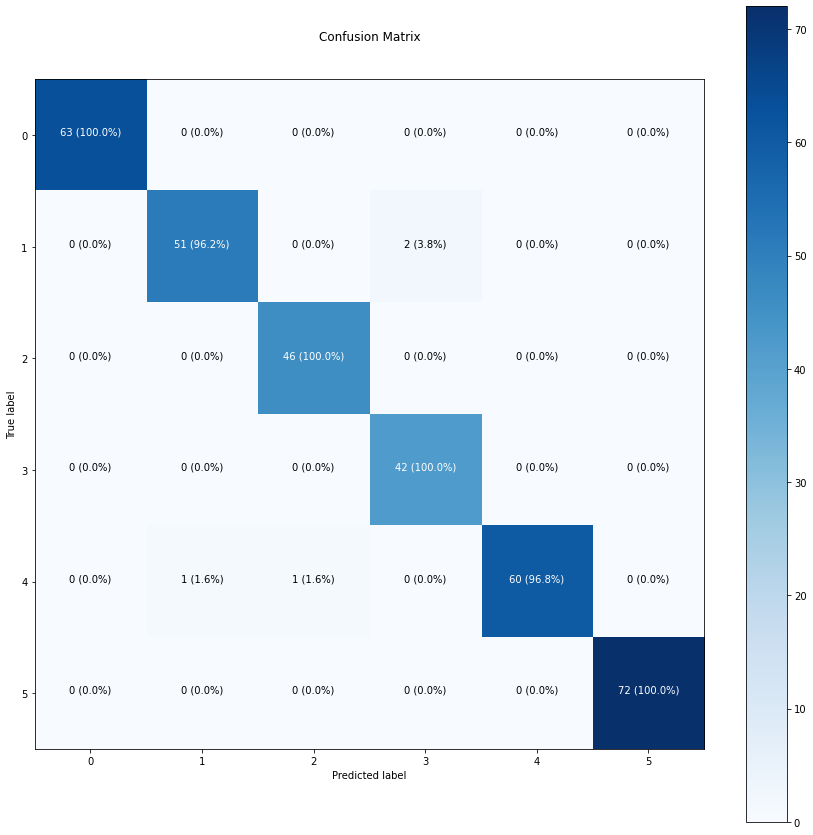

In [ ]:
make_confusion_matrix(y_true=encoder.inverse_transform(y_test), 
                      y_pred=encoder.inverse_transform(y_pred),
                      figsize=(15, 15),
                      text_size=10)